In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

C:\Programs\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
bdc = pd.read_csv('unicorns.csv')

### The Data
The dataset we're working with today comes from Kaggle(hyperlink) and contains information about startups valued at over a billion dollars on crunchbase(link). This information includes their last valuation, the date that they were first listed on crunchbase, as well as their location and investors. Now initially we're just going to play around with the data and try to extract some helpful anecdotes from it, but keep that list of data points in mind because I have a both fun and pointless idea for what we can ultimately do with it.

In [3]:
bdc.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


In [4]:
# This just cleans up some inconsistent formatting in the "Industry" column.
bdc['Industry'] = bdc['Industry'].map(str.title)
bdc['Industry'] = bdc['Industry'].map(str.strip)
# This parses the lists provided in the "Investors" column into python lists.
bdc['Investors'] = bdc['Investors'].map(lambda x:re.sub('[\[\]"]', '', x).split(','))

#### What industries are the biggest?

First let's get a sense for the popularity and value of each industry around the world.

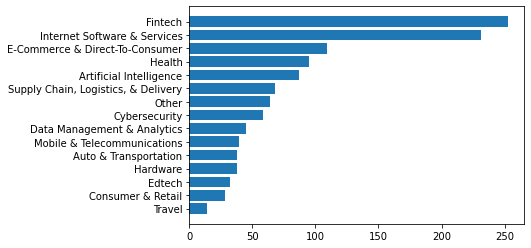

In [5]:
industry_counts = bdc['Industry'].value_counts(sort=True, ascending=True)

plt.barh(industry_counts.index, industry_counts)
plt.show()

In [6]:
industries_by_country = pd.DataFrame([])

for country in bdc['Country'].unique():
    industries_in_country = bdc[bdc['Country'] == country]['Industry'].value_counts()
    industries_in_country.name = country
    industries_by_country = industries_by_country.append(industries_in_country)

industries_by_country.fillna(0, inplace=True)

industries_by_country['Total'] = industries_by_country.sum(axis=1)
industries_by_country.sort_values('Total', inplace=True, ascending=False)
industries_by_country.drop('Total', axis=1, inplace=True)

industries_by_country = industries_by_country.reindex(industries_by_country.sum(axis=0).sort_values(ascending=True).index, axis=1)

In [7]:
industries_by_country.head()

,Travel,Consumer & Retail,Edtech,Auto & Transportation,Hardware,Mobile & Telecommunications,Data Management & Analytics,Cybersecurity,Other,"Supply Chain, Logistics, & Delivery",Artificial Intelligence,Health,E-Commerce & Direct-To-Consumer,Internet Software & Services,Fintech
United States,1.0,13.0,9.0,10.0,13.0,13.0,35.0,45.0,33.0,26.0,52.0,72.0,27.0,163.0,133.0
China,3.0,8.0,12.0,18.0,18.0,13.0,2.0,1.0,6.0,12.0,19.0,10.0,28.0,15.0,8.0
India,1.0,0.0,7.0,2.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,2.0,17.0,13.0,17.0
United Kingdom,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,3.0,27.0
Germany,3.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,1.0,5.0,4.0,6.0


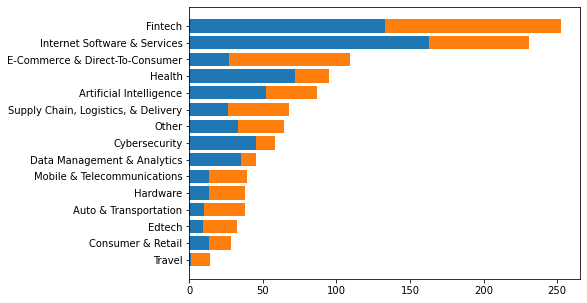

In [8]:
n = 1

fig, ax = plt.subplots(figsize=(7, 5))

top_n_countries = industries_by_country.head(n)
left = np.zeros(top_n_countries.shape[1])

for country in top_n_countries.index:
    values = top_n_countries.loc[country]
    industries = top_n_countries.columns
    
    ax.barh(industries, values, left=left)
    
    left += values

remain_country_count = industries_by_country.shape[0] - n
other_countries = industries_by_country.tail(remain_country_count)
ax.barh(other_countries.columns, other_countries.sum(axis=0), left=left)
plt.show()

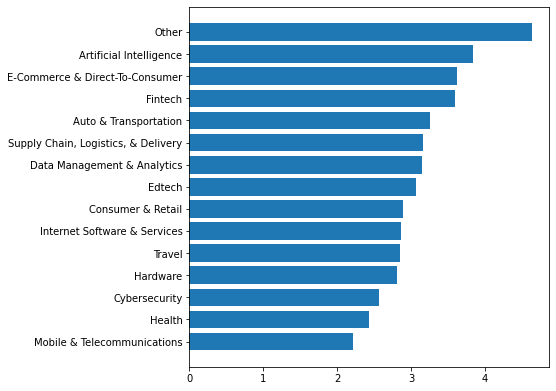

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

industry_means = bdc['Last Valuation (Billion $)'].groupby(bdc['Industry']).mean()
industry_means.sort_values(inplace = True)

ax.barh(industry_means.index, industry_means)
plt.show()

In [10]:
bdc.sort_values('Last Valuation (Billion $)', ascending = False).head(5)

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
1121,"10/31/2022, 2:32:38 AM",ByteDance,https://www.cbinsights.com/company/bytedance,140.0,4/7/2017,2017,Beijing,China,Artificial Intelligence,"[Sequoia Capital China, SIG Asia Investments, ...",NaN
1195,"10/31/2022, 2:32:38 AM",SpaceX,https://www.cbinsights.com/company/space-explo...,127.0,12/1/2012,2012,Hawthorne,United States,Other,"[Founders Fund, Draper Fisher Jurvetson, Rothe...",NaN
1079,"10/31/2022, 2:32:39 AM",SHEIN,https://www.cbinsights.com/company/shein,100.0,7/3/2018,2018,Shenzhen,China,E-Commerce & Direct-To-Consumer,"[Tiger Global Management, Sequoia Capital Chin...",NaN
1188,"10/31/2022, 2:32:39 AM",Stripe,https://www.cbinsights.com/company/stripe,95.0,1/23/2014,2014,San Francisco,United States,Fintech,"[Khosla Ventures, LowercaseCapital, capitalG]",NaN
1078,"10/31/2022, 2:32:40 AM",Canva,https://www.cbinsights.com/company/canva,40.0,1/8/2018,2018,Surry Hills,Australia,Internet Software & Services,"[Sequoia Capital China, Blackbird Ventures, Ma...",NaN


#### Who are your investors and what do they do?

In [11]:
investors = pd.get_dummies(bdc['Investors'].apply(pd.Series).stack()).sum(level=0)

In [12]:
ranked_investors = investors.sum(axis=0).sort_values(ascending=False)

In [13]:
ranked_investors.head(10)

Accel                          64
Andreessen Horowitz            60
Tiger Global Management        57
Insight Partners               56
Sequoia Capital                53
Sequoia Capital China          48
General Catalyst               43
Lightspeed Venture Partners    40
SoftBank Group                 35
Index Ventures                 32
dtype: int64

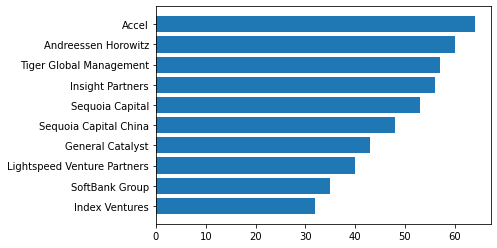

In [14]:
top_10_investors = ranked_investors.head(10)
top_10_investors.sort_values(ascending=True, inplace=True)

plt.barh(top_10_investors.index[0:10], top_10_investors.head(10))
plt.show()

#### What's in a name? (Bonus Round)

(array([  0.,   0.,   4.,  19.,  82., 119., 169., 151., 128., 117.,  84.,
         63.,  46.,  41.,  34.,  32.,  24.,  21.,  13.,  11.,   6.,  11.,
          7.,   1.,   2.,   2.,   4.,   3.,   2.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

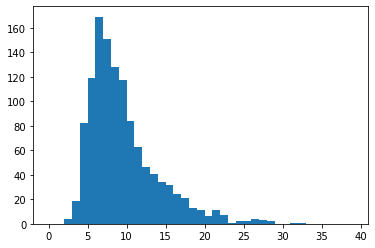

In [15]:
plt.hist(bdc['Company'].str.len(), bins=range(40))

In [16]:
bdc[bdc['Company'].str.len() == 40]

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
170,"10/31/2022, 2:35:00 AM",Fresh Life Style Supply Chain Management,https://www.cbinsights.com/company/xianshenghuo,1.57,3/11/2022,2022,Chengdu,China,"Supply Chain, Logistics, & Delivery","[Guiyang Venture Capital, Longfor Capital, CAO...",NaN


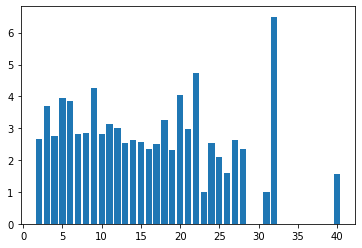

In [17]:
len_mean = bdc['Last Valuation (Billion $)'].groupby(bdc['Company'].str.len()).mean()
plt.bar(len_mean.index, len_mean)
plt.show()

### Using Deep Learning to Predict A Companies Valuation, Because Why Not?

In [18]:
from sklearn.linear_model import LinearRegression

##### Feature Creation

In [19]:
bdc.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[Next Play Ventures, Zeal Capital Partners, So...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet Software & Services,"[Accel, 14W, GS Growth]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data Management & Analytics,"[General Catalyst, Nexus Venture Partners, Del...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet Software & Services,"[Lightspeed India Partners, Sequoia Capital In...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[AWZ Ventures, Blackstone, Insight Partners]",NaN


In [20]:
investor_dummies = pd.get_dummies(bdc['Investors'].apply(pd.Series).stack())
industry_dummies = pd.get_dummies(bdc['Industry'])
city_dummies = pd.get_dummies(bdc['City'])
year = bdc['Year Joined']

industry_dummies = industry_dummies.drop(industry_dummies.columns[-1], axis=1)
city_dummies = city_dummies.drop(city_dummies.columns[-1], axis=1)

In [21]:
X = pd.concat([industry_dummies, city_dummies], axis=0).sum(level=0)

In [22]:
y = bdc['Last Valuation (Billion $)']

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [25]:
from tensorflow import keras

In [26]:
model = keras.models.Sequential()

In [27]:
model.add(keras.layers.Dense(32, input_shape = (None, X.shape[1])))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1, activation = 'relu'))

In [28]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 32)          9472      
                                                                 
 dense_1 (Dense)             (None, None, 8)           264       
                                                                 
 dense_2 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 9,745
Trainable params: 9,745
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test))

Epoch 1/40
29/29 [==============================] - 1s 16ms/step - loss: 83.5983 - val_loss: 15.2690
Epoch 2/40
29/29 [==============================] - 0s 8ms/step - loss: 79.8156 - val_loss: 12.4830
Epoch 3/40
29/29 [==============================] - 0s 8ms/step - loss: 75.9403 - val_loss: 10.9590
Epoch 4/40
29/29 [==============================] - 0s 8ms/step - loss: 73.6407 - val_loss: 11.2416
Epoch 5/40
29/29 [==============================] - 0s 7ms/step - loss: 72.5695 - val_loss: 11.5146
Epoch 6/40
29/29 [==============================] - 0s 8ms/step - loss: 72.0747 - val_loss: 11.9010
Epoch 7/40
29/29 [==============================] - 0s 7ms/step - loss: 71.5406 - val_loss: 12.1084
Epoch 8/40
29/29 [==============================] - 0s 7ms/step - loss: 71.0966 - val_loss: 12.4314
Epoch 9/40
29/29 [==============================] - 0s 8ms/step - loss: 70.7593 - val_loss: 12.9135
Epoch 10/40
29/29 [==============================] - 0s 8ms/step - loss: 70.3522 - val_loss: 13.113